# MetaMagDyn Analyzer Step by step

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import metamagdyn

# SymAnalyzer Class

Create a **SymAnalyzer** name using the folder name of the simulation

In [3]:
import metamagdyn
SimName = 'Disk_DC_X_RF_Y'
MySim = metamagdyn.analyzer.SimAnalyzer(SimName)
MySim

Disk_DC_X_RF_Y SimAnalyzer

## Magnetization curve MxH

The magnetization curve MxH can be plotted using the **plotMxH** function

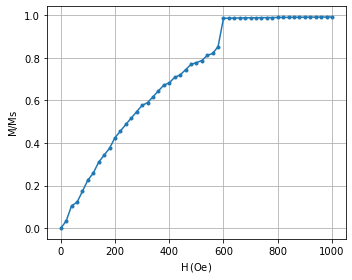

In [4]:
metamagdyn.plotMxH(MySim, figName='MxH')

or getting the data from **MySim.mStatic**

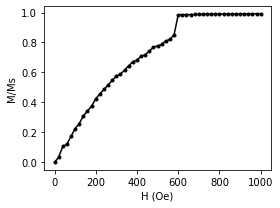

In [5]:
M = MySim.mStatic[0] # X direction of static magnetization
H = MySim.hs # Simulation fields

figure('MxH 2', (4,3))
plot(H, M , 'k.-')
xlabel('H (Oe)')
ylabel('M/Ms')
tight_layout()

## Broadband FMR Absortion color maps

**plotPxhxf** function creates the color maps

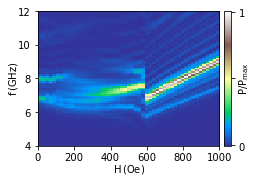

In [6]:
import metamagdyn
SimName = 'Disk_DC_X_RF_Y'
MySim = metamagdyn.analyzer.SimAnalyzer(SimName)

metamagdyn.plotPxhxf(MySim, cmap='terrain')

Not interpolated Color map data is stored in the **MySim.raw_absorbed_power** variable

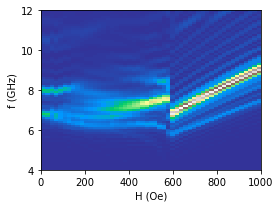

In [7]:
PlotData = MySim.raw_absorbed_power
fig = figure('ColorMap', (4,3))
fig.clear()
extent = (MySim.hs.min(), MySim.hs.max(), MySim.fs.min()/1E9, MySim.fs.max()/1E9)
imshow(PlotData.T, 
       extent = extent,
       aspect = 'auto',
       origin = 'lower',
       interpolation = 'none',
       cmap = 'terrain')
xlabel('H (Oe)')
ylabel('f (GHz)')
tight_layout()

## Cuts in absortion color maps

To take the data from a cut of the color map, use **MySim.fi** and **MySim.hi** functions to get the right indices for the **MySim.absorbed_power** array

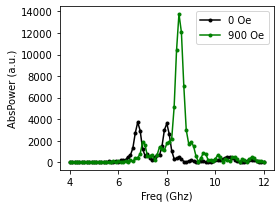

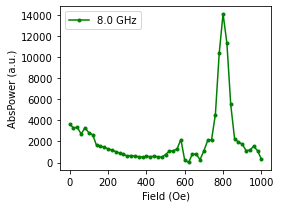

In [8]:
FieldCut0 = MySim.absorbed_power[MySim.hi(0), :] #Cut at 0 Oe
FieldCut1 = MySim.absorbed_power[MySim.hi(900), :] #Cut at 900 Oe

fig = figure('Field Cuts', (4,3))
fig.clear()
plot(MySim.fs/1E9, FieldCut0, 'k.-')
plot(MySim.fs/1E9, FieldCut1, 'g.-')
legend(['0 Oe','900 Oe'])
xlabel('Freq (Ghz)')
ylabel('AbsPower (a.u.)')
tight_layout()


FreqCut = MySim.absorbed_power[:, MySim.fi(8.0E9)] #Cut at 8.0 GHz

fig = figure('Frequency Cut', (4,3))
fig.clear()
plot(MySim.hs, FreqCut, 'g.-')
legend(['8.0 GHz'])
xlabel('Field (Oe)')
ylabel('AbsPower (a.u.)')
tight_layout()



# Global Data

**MySim.** or has the following members and functions:

    MySim.doneMask : Boolean array of allready simulated {hi, fi} points    [hi, fi]
    MySim.DC_dir : DC field direction vector  [xyz]
    MySim.RF_dir : RF field direction vector  [xyz]
    MySim.tOsc : Array of simulation times between one oscilition period [hi, fi, ti]
    MySim.mOsc : Array of spatial average magnetization direction [xyz, hi, fi, ti]
    MySim.bOsc : Array of spatial average field DC + RF (in Tesla) [xyz, hi, fi, ti]
    MySim.mStatic : Vector list of magnetization spatial average [xyz, hi]
    MySim.absorbed_power : Interpolated array of Microwave Absorbed Power [hi, fi]
    MySim.raw_absorbed_power : Array of Microwave Absorbed Power [hi, fi]

In [9]:
MySim

Disk_DC_X_RF_Y SimAnalyzer

# Static (DC) Data

To analyze DC vector fields a Static (DC) Data Holder must be created using the **MySim.getFieldAnalyzer** function

In [10]:
MySim.HA = MySim.getFieldAnalyzer(h = 900) #Get the simulation data (Static_Data) for field 0 Oe
MySim.HA

Static (DC) Simulation data holder for Disk_DC_X_RF_Y SimAnalyzer
 Field = 900.0000
  hi = 45        

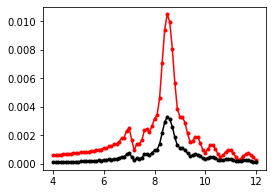

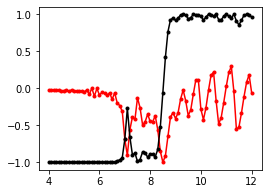

In [11]:
fig = figure('Amp', (4,3))
fig.clear()
plot(MySim.fs/1E9, MySim.HA.m_amp[1,:], 'r.-')
plot(MySim.fs/1E9, MySim.HA.m_amp[2,:], 'k.-')

fig = figure('Phase', (4,3))
fig.clear()
plot(MySim.fs/1E9, sin(MySim.HA.m_phase[1,:]), 'r.-')
plot(MySim.fs/1E9, sin(MySim.HA.m_phase[2,:]), 'k.-')

**Static_Data** has the following members and functions:
    
    Static_Data.h : DC field used to create this object
    
    Static_Data.vector_field : Static Magnetization Vector Field (OMMF_Vector_Field class)
    Static_Data.nan_mask : XY Mask were Vector Fields data is not valid [xi, yi]
    
    Static_Data.u_r : Direction of static (DC) magnetization (unitary vectors) [xi, yi, zi, xyz]
    Static_Data.u_phi : In plane vectors perpendicular to the static (DC) magnetization [xi, yi, zi, xyz]
    Static_Data.u_theta : Out plane vectors perpendicular to the static (DC) magnetization [xi, yi, zi, xyz]
    
    Static_Data.m_amp : Spatial mean magnetization oscillation amplitude vector [xyz, fi]
    Static_Data.m_phase : Phases (in rads) of the spatial mean magnetization oscillation, [xyz, fi]
    
    Static_Data.getFrequencyAnalyzer : Creates a Oscillating (RF) Data Holder  

## Static Vector Field

Static magnetization configuration can be obtained from **Static_Data.u_r**

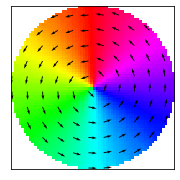

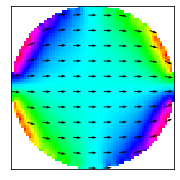

In [4]:
def plotArrowField(arrows, nan_mask, figName= 'ArrowField'):
    arrows = arrows.copy()
    angles = arctan2(arrows[:,:,1], arrows[:,:,0]) * 180/pi
    (nx,ny) = angles.shape
    xs = numpy.arange(0, nx, 1)
    ys = numpy.arange(0, ny, 1)
    X, Y = numpy.meshgrid(xs, ys)

    angles[nan_mask] = numpy.nan
    arrows[nan_mask] = numpy.nan

    fig = figure(figName, (3,3))
    fig.clear()
    sp = fig.add_subplot(1,1,1)

    imshow(angles.T, 
           origin = 'lower', 
           cmap = 'hsv',
           interpolation = 'none',
           aspect = 1
           )
    qS = 6
    quiver(X[::qS,::qS], Y[::qS,::qS], 
           arrows[::qS,::qS,0].T, arrows[::qS,::qS,1].T)

    sp.set_xticks([])
    sp.set_yticks([])
    

    
#You can create more than one StaticData Holder.
#just use diferent names

MySim.HA = MySim.getFieldAnalyzer(h = 0) #Get the simulation data for field 0 Oe
MySim.HA2 = MySim.getFieldAnalyzer(h = 900) #Get the simulation data for field 900 Oe

#Arrows in the magnetization direction
arrows = MySim.HA.u_r[:,:,0,:]  #arrows.shape = [xi,yi,xyz]
nan_mask = MySim.HA.nan_mask
plotArrowField(arrows, nan_mask, 'Static Magnetization H = 0 Oe')

arrows = MySim.HA2.u_r[:,:,0,:]  #arrows.shape = [xi,yi,xyz]
nan_mask = MySim.HA2.nan_mask
plotArrowField(arrows, nan_mask, 'Static Magnetization H = 900 Oe')

# Oscillation (RF) Data

To analyze RF vector fields a Oscillating (RF) Data Holder must be created using the **StaticData.getFrequencyAnalyzer** function

In [20]:
#Create Oscillation_Data objects
MySim.HA = MySim.getFieldAnalyzer(h = 0)
MySim.HA.mode0 = MySim.HA.getFrequencyAnalyzer(f = 6.8E9) #RF simulation data for field 0 Oe and Freq 6.8 GHz
MySim.HA.mode1 = MySim.HA.getFrequencyAnalyzer(f = 8.0E9) #RF simulation data for field 0 Oe and Freq 8.0 GHz

#Create a list of Oscillation_Data objects
MySim.HA2 = MySim.getFieldAnalyzer(h = 900)
MySim.HA2.modes = []
for f in [8.5E9, 7.0E9, 10.8E9]:
    RFA = MySim.HA2.getFrequencyAnalyzer(f)
    MySim.HA2.modes.append(RFA)

In [21]:
MySim.HA2.modes[1]

Oscillation (RF) data holder for Disk_DC_X_RF_Y SimAnalyzer
 Field = 900.0000
  hi = 45
 Frequency = 7.0000 GHz
  fi =30        

In [22]:
MySim.HA2.modes[1]._raw_data.shape

(20, 64, 64, 1, 3)

**Oscillation_Data** has the following members and functions:
    
    Oscillation_Data.f : Frequency field used to create this object

    Oscillation_Data.m_amp : Oscillation amplitude of the magnetization vector [xi, yi, zi, xyz]
    Oscillation_Data.m_phase : Phases of each component of the oscillating magnetization vector [xi, yi, zi, xyz]

    Oscillation_Data.phi_amp : In-plane oscillation amplitude [xi, yi, zi]
    Oscillation_Data.phi_phase : In-plane oscillation phase [xi, yi, zi]

    Oscillation_Data.theta_amp : Out-of-plane oscillation amplitude [xi, yi, zi]
    Oscillation_Data.theta_phase : Out-of-plane oscillation phase [xi, yi, zi]

## Standing spin waves modes

Best way to see a standing spin wave is just to see the oscillation amplitude **Oscillation_Data.phi_amp**, and check that the phase **Oscillation_Data.phi_phase** does not change smmothly with position

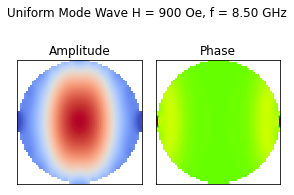

In [23]:
mode = MySim.HA2.modes[0]

fig = figure(f'Uniform Mode Wave H = {int(mode._StaticData.h)} Oe, f = {mode.f/1E9:0.2f} GHz', (4,3))
fig.clear()
fig.suptitle(fig.get_label())

amp = 1
#here we plot the in plane oscillation
plotData = mode.phi_amp[:,:,0].copy()  #only XY data
plotData = plotData.clip(-amp, amp)
plotData[mode._StaticData.nan_mask] = nan
sp = fig.add_subplot(1,2,1)
sp.imshow(plotData.T, 
          origin='lower', 
          cmap='coolwarm')
sp.set_xticks([])
sp.set_yticks([])
sp.set_title('Amplitude')

plotData = mode.phi_phase[:,:,0].copy()*180/pi  #only XY data
plotData[mode._StaticData.nan_mask] = nan
plotData[0,0] = -180
plotData[-1,-1] = 180
sp = fig.add_subplot(1,2,2)
sp.imshow(plotData.T, 
          origin='lower', 
          cmap='hsv')
sp.set_xticks([])
sp.set_yticks([])
sp.set_title('Phase')

tight_layout()

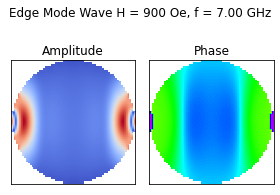

In [24]:
mode = MySim.HA2.modes[1]

fig = figure(f'Edge Mode Wave H = {int(mode._StaticData.h)} Oe, f = {mode.f/1E9:0.2f} GHz', (4,3))
fig.clear()
fig.suptitle(fig.get_label())

amp = 1
#here we plot the in plane oscillation
plotData = mode.phi_amp[:,:,0].copy()  #only XY data
plotData = plotData.clip(-amp, amp)
plotData[mode._StaticData.nan_mask] = nan
sp = fig.add_subplot(1,2,1)
sp.imshow(plotData.T, 
          origin='lower', 
          cmap='coolwarm')
sp.set_xticks([])
sp.set_yticks([])
sp.set_title('Amplitude')

plotData = mode.phi_phase[:,:,0].copy()*180/pi  #only XY data
plotData[mode._StaticData.nan_mask] = nan
plotData[0,0] = -180
plotData[-1,-1] = 180
sp = fig.add_subplot(1,2,2)
sp.imshow(plotData.T, 
          origin='lower', 
          cmap='hsv')
sp.set_xticks([])
sp.set_yticks([])
sp.set_title('Phase')

tight_layout()

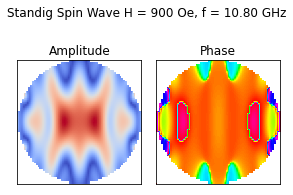

In [11]:
mode = MySim.HA2.modes[2]

fig = figure(f'Standig Spin Wave H = {int(mode._StaticData.h)} Oe, f = {mode.f/1E9:0.2f} GHz', (4,3))
fig.clear()
fig.suptitle(fig.get_label())

amp = 1
#here we plot the in plane oscillation
plotData = mode.phi_amp[:,:,0].copy()  #only XY data
plotData = plotData.clip(-amp, amp)
plotData[mode._StaticData.nan_mask] = nan
sp = fig.add_subplot(1,2,1)
sp.imshow(plotData.T, 
          origin='lower', 
          cmap='coolwarm')
sp.set_xticks([])
sp.set_yticks([])
sp.set_title('Amplitude')

plotData = mode.phi_phase[:,:,0].copy()*180/pi  #only XY data
plotData[mode._StaticData.nan_mask] = nan
plotData[0,0] = -180
plotData[-1,-1] = 180
sp = fig.add_subplot(1,2,2)
sp.imshow(plotData.T, 
          origin='lower', 
          cmap='hsv')
sp.set_xticks([])
sp.set_yticks([])
sp.set_title('Phase')

tight_layout()

## Traveling spin waves
In traveling spin waves the phase **Oscillation_Data.phi_phase** does change smothly with position

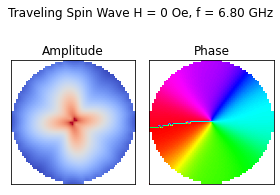

In [25]:
mode = MySim.HA.mode0

fig = figure(f'Traveling Spin Wave H = {int(mode._StaticData.h)} Oe, f = {mode.f/1E9:0.2f} GHz', (4,3))
fig.clear()
fig.suptitle(fig.get_label())

amp = 0.02
#here we plot the in plane oscillation
plotData = mode.phi_amp[:,:,0].copy()  #only XY data
plotData = plotData.clip(-amp, amp)
plotData[mode._StaticData.nan_mask] = nan
sp = fig.add_subplot(1,2,1)
sp.imshow(plotData.T, 
          origin='lower', 
          cmap='coolwarm')
sp.set_xticks([])
sp.set_yticks([])
sp.set_title('Amplitude')

plotData = mode.phi_phase[:,:,0].copy()*180/pi  #only XY data
plotData[mode._StaticData.nan_mask] = nan
plotData[0,0] = -180
plotData[-1,-1] = 180
sp = fig.add_subplot(1,2,2)
sp.imshow(plotData.T, 
          origin='lower', 
          cmap='hsv')
sp.set_xticks([])
sp.set_yticks([])
sp.set_title('Phase')

tight_layout()

To visualize the traveling spin wave it is better to make a time series of the oscillations  
This is done by reconstructing the time data using the amplitude and phase

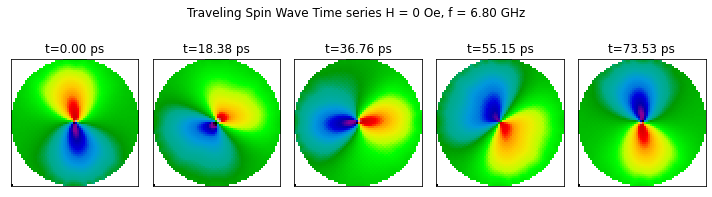

In [26]:
mode = MySim.HA.mode0
amp = 0.02

#we first create the time list were to reconstruct the ocsillating data 
ts = linspace(0, 0.5/mode.f, 5) #5 points in half an oscillating period

#then we create the time series using the apropiate array indices arrangmet
w = 2 * pi * mode.f
TimeSeries = mode.phi_amp[None,:,:,0] * sin(w*ts[:,None,None] + mode.phi_phase[None,:,:,0])
#The resulting array has shape [ti, xi, yi]
TimeSeries[:, mode._StaticData.nan_mask] = numpy.nan
TimeSeries = TimeSeries.clip(-amp, amp)
TimeSeries[:,0,0] = -amp
TimeSeries[:,-1,-1] = amp

fig = figure(f'Traveling Spin Wave Time series H = {int(MySim.HA.h)} Oe, f = {mode.f/1E9:0.2f} GHz', (10,3))
fig.clear()
fig.suptitle(fig.get_label())

for i in range(5):
    sp = fig.add_subplot(1,5,i+1)
    sp.imshow(TimeSeries[i].T, 
              origin='lower', 
              cmap='nipy_spectral')
    sp.set_xticks([])
    sp.set_yticks([])
    sp.set_title('t=%0.2f ps' %(ts[i]*1E12))
tight_layout()

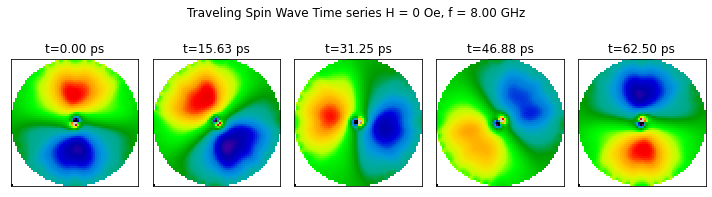

In [14]:
mode = MySim.HA.mode1
amp = 0.012

#we first create the time list were to reconstruct the ocsillating data 
ts = linspace(0, 0.5/mode.f, 5) #5 points in half an oscillating period

#then we create the time series using the apropiate array indices arrangmet
w = 2 * pi * mode.f
TimeSeries = mode.phi_amp[None,:,:,0] * sin(w*ts[:,None,None] + mode.phi_phase[None,:,:,0])
#The resulting array has shape [ti, xi, yi]
TimeSeries[:, mode._StaticData.nan_mask] = numpy.nan
TimeSeries = TimeSeries.clip(-amp, amp)
TimeSeries[:,0,0] = -amp
TimeSeries[:,-1,-1] = amp

fig = figure(f'Traveling Spin Wave Time series H = {int(MySim.HA.h)} Oe, f = {mode.f/1E9:0.2f} GHz', (10,3))
fig.clear()
fig.suptitle(fig.get_label())

for i in range(5):
    sp = fig.add_subplot(1,5,i+1)
    sp.imshow(TimeSeries[i].T, 
              origin='lower', 
              cmap='nipy_spectral')
    sp.set_xticks([])
    sp.set_yticks([])
    sp.set_title('t=%0.2f ps' %(ts[i]*1E12))
tight_layout()

# Extra Fields and Energies

To get the mumax output quantities use the GetStaticField or GetDynamicField methods

Energy desities (scalar fields)  
    Edens_Zeeman  
    Edens_demag  
    Edens_exch  
    Edens_total  

Fields (vector fields)  
    B_ext  
    B_demag  
    B_exch  
    B_eff  

In [27]:
MySim.HA = MySim.getFieldAnalyzer(h = 0)

e_Zeeman = MySim.HA.GetStaticField('Edens_Zeeman')
e_Demag = MySim.HA.GetStaticField('Edens_demag')
e_Exch = MySim.HA.GetStaticField('Edens_exch')
e_Total = MySim.HA.GetStaticField('Edens_total')

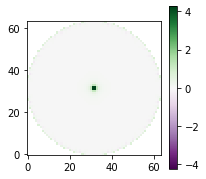

In [28]:
fig = figure('Energy Density', (3,3))
fig.clear()
sp = fig.add_subplot(1,1,1)

#Here we plot the total energy density
e = e_Total.copy()[:,:,0,0]/1E5
scale = np.abs(e).max()
e[MySim.HA.nan_mask] = numpy.nan

imshow(e.T, 
        origin = 'lower', 
        cmap = 'PRGn',
        interpolation = 'none',
        aspect = 1,
        vmin = -scale, vmax = scale
        )
colorbar()

In [29]:
#Escolha aqui campo e freq
MySim.HA = MySim.getFieldAnalyzer(h = 0)
MySim.HA.mode0 = MySim.HA.getFrequencyAnalyzer(f = 6.8E9)

e_Zeeman_Dyn = MySim.HA.mode0.GetDynamicField('Edens_Zeeman')
e_Demag_Dyn = MySim.HA.mode0.GetDynamicField('Edens_demag')
e_Exch_Dyn = MySim.HA.mode0.GetDynamicField('Edens_exch')
e_Total_Dyn = MySim.HA.mode0.GetDynamicField('Edens_total')

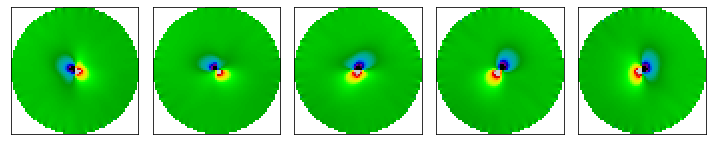

In [30]:
fig = figure('Dynamic Energy', (10,3))
fig.clear()

#Here we plot the demagnetization energy oscillation
eX = (e_Demag_Dyn).copy()[:,:,:,0,0]/1E4
eX = eX - eX.mean(axis=0)[None,:,:]
scale = 0.15 
for ei in eX:
    ei[MySim.HA.nan_mask] = numpy.nan

for i in range(5):
    sp = fig.add_subplot(1,5,i+1)
    sp.imshow((eX[2*i]).T, 
              origin='lower',
              vmin = -scale, vmax = scale,
              cmap='nipy_spectral')
    sp.set_xticks([])
    sp.set_yticks([])
tight_layout()

In [31]:
MySim.HA = MySim.getFieldAnalyzer(h = 0)
MySim.HA.mode1 = MySim.HA.getFrequencyAnalyzer(f = 8E9)

e_Zeeman_Dyn2 = MySim.HA.mode1.GetDynamicField('Edens_Zeeman')
e_Demag_Dyn2 = MySim.HA.mode1.GetDynamicField('Edens_demag')
e_Exch_Dyn2 = MySim.HA.mode1.GetDynamicField('Edens_exch')
e_Total_Dyn2 = MySim.HA.mode1.GetDynamicField('Edens_total')

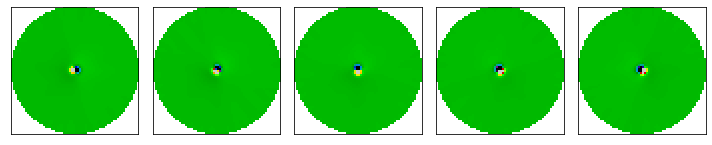

In [32]:
fig = figure('Dynamic Energy2', (10,3))
fig.clear()

#Here we plot the exchange energy oscillation
eX = (e_Exch_Dyn2).copy()[:,:,:,0,0]/1E4
eX = eX - eX.mean(axis=0)[None,:,:]
scale = 0.15 #np.abs(e).max()
for ei in eX:
    ei[MySim.HA.nan_mask] = numpy.nan

for i in range(5):
    sp = fig.add_subplot(1,5,i+1)
    sp.imshow((eX[2*i]).T, 
              origin='lower',
              vmin = -scale, vmax = scale,
              interpolation = 'antialiased',
              cmap='nipy_spectral')
    sp.set_xticks([])
    sp.set_yticks([])
tight_layout()